#**Task 5: K-means suffers a lot when the dataset is not flat**

#**5.1 Import libraries**

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

#**5.2. Implementation**
In the following code comparison between K-means and Spectral Clustering Models on the moons dataset found in Scikit-Learn using two different Unsupervised metrics:
> silhouette_score  
> fowlkes_mallows_score

kmeans_model  silhouette_score =  0.3532217248285134
kmeans_model  fowlkes_mallows_score =  0.4993538143265342
-----------------------------------------------------------------
Kernel_model  silhouette_score =  0.11306218805211073
Kernel_model  fowlkes_mallows_score =  1.0
-----------------------------------------------------------------
kmeans_model  silhouette_score =  0.4963759784351305
kmeans_model  fowlkes_mallows_score =  0.736324182373805
-----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Kernel_model  silhouette_score =  0.39100784635207175
Kernel_model  fowlkes_mallows_score =  1.0
-----------------------------------------------------------------
kmeans_model  silhouette_score =  0.42653894065789577
kmeans_model  fowlkes_mallows_score =  0.9841070355136174
-----------------------------------------------------------------
Kernel_model  silhouette_score =  0.4261006648868427
Kernel_model  fowlkes_mallows_score =  0.9841070355136174
-----------------------------------------------------------------


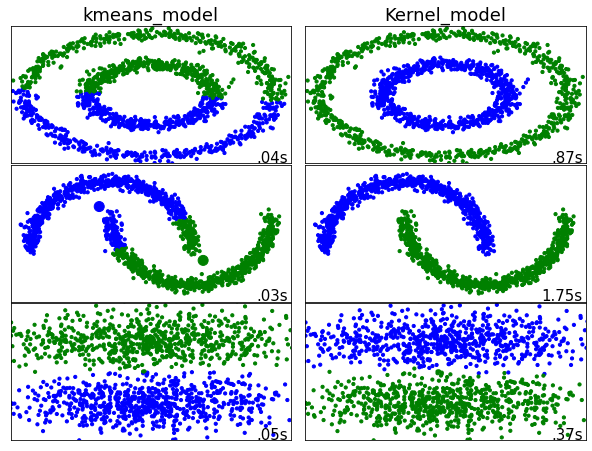

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, centers =2,cluster_std=2,random_state=8)

colors = np.array(['blue','green','yellow','purple'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs]):
    X, y = dataset
    X = StandardScaler().fit_transform(X) # normalize dataset for easier parameter selection

    # create clustering estimators
    kmeans_model = KMeans(n_clusters=2, random_state=1) #K-Means Model    
    Kernel_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')#SpectralClustering Model
    
    for name, algorithm in [('kmeans_model', kmeans_model),
                            ('Kernel_model', Kernel_model)]:
    #predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        #two unsupervised metrics    
        print(name," silhouette_score = ", metrics.silhouette_score(X, algorithm.labels_, metric='euclidean'))
        print(name," fowlkes_mallows_score = ", metrics.fowlkes_mallows_score(y, y_pred))
        print('-----------------------------------------------------------------')

        # plot
        plt.subplot(4, 2, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()

##**k-means is limited to linear cluster boundaries**
###The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

###In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. 
###It is clear from the cluster labels found by the typical k-means approach by using  the moons data with different shapes we have used.
###This is reminiscent of the SVM, where it uses a kernel transformation to project the data into a higher dimension where a linear separation is possible. By using the same ide to allow k-means to discover non-linear boundaries.

### One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data and then assigns labels using a k-means algorithm

#**I've selected two different Unsupervised metrics to compare between K-means and the Specteral Clustering**
# One of the requre the require the knowledge of the ground truth classes (lables):
#**1. Fowlkes-Mallows scores:**
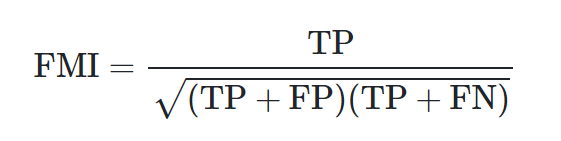

The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.




# And the other metric doesn't require a label to be evaluated.
#**2.Silhouette Coefficient**
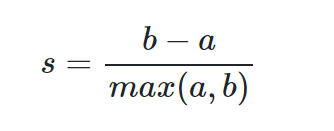

**a:** The mean distance between a sample and all other points in the same class.

**b:** The mean distance between a sample and all other points in the next nearest cluster.
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.



#**Thank you!**